In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as KL
import tensorflow.keras.models as KM
from matplotlib import pyplot as plt
!pip install Pillow
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import Cifar10 dataset

In [2]:
cifar = tf.keras.datasets.cifar10 

#Loading dataset

In [3]:
(x_train,y_train),(x_test,y_test) = cifar.load_data()

170498071/170498071 [==============================] - 3s 0us/step


#Check the dimensions of the image dataset, and the their labels

In [4]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

#Visualize an image from the training set

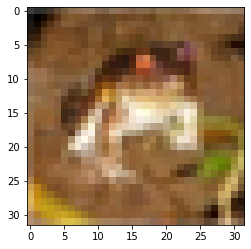

In [5]:
plt.imshow(x_train[0])

#Normalize the both training and test sets

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

#Check the number of classes of the dataset

In [ ]:
np.max(np.unique(y_train))

(9, (50000, 32, 32, 3), (10000, 32, 32, 3))

#VggNet-16 architecture

In [ ]:
inputs = KL.Input(shape=(32,32,3))

m = KL.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu)(inputs)

c = KL.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu)(m)

m = KL.MaxPool2D((2,2),strides=(2,2))(c)

c = KL.Conv2D(128,(3,3),padding='same',activation=tf.nn.relu)(m)

c = KL.Conv2D(128,(3,3),padding='same',activation=tf.nn.relu)(c)

m = KL.MaxPool2D((2,2),strides=(2,2))(c)

c = KL.Conv2D(256,(3,3),padding='same',activation=tf.nn.relu)(m)

c = KL.Conv2D(256,(3,3),padding='same',activation=tf.nn.relu)(c)

c = KL.Conv2D(256,(3,3),padding='same',activation=tf.nn.relu)(c)

m = KL.MaxPool2D((2,2),strides=(2,2))(c)

c = KL.Conv2D(512,(3,3),padding='same',activation=tf.nn.relu)(m)

c = KL.Conv2D(512,(3,3),padding='same',activation=tf.nn.relu)(c)

c = KL.Conv2D(512,(3,3),padding='same',activation=tf.nn.relu)(c)

m = KL.MaxPool2D((2,2),strides=(2,2))(c)

c = KL.Conv2D(512,(3,3),padding='same',activation=tf.nn.relu)(m)

c = KL.Conv2D(512,(3,3),padding='same',activation=tf.nn.relu)(c)

c = KL.Conv2D(512,(3,3),padding='same',activation=tf.nn.relu)(c)

m = KL.MaxPool2D((2,2),strides=(2,2))(c)


f = KL.Flatten()(m)

c = KL.Dense(4096,activation=tf.nn.relu)(f)

c = KL.Dense(4096,activation=tf.nn.relu)(c)

ouputs = KL.Dense(10,activation=tf.nn.softmax)(c)

model = KM.Model(inputs,ouputs)



In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_79 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_80 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_82 (Conv2D)          (None, 16, 16, 128)       147584    
                                                           

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001
),loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=100)

Epoch 1/100
500/500 [==============================] - 28s 55ms/step - loss: 1.9828 - accuracy: 0.2081
Epoch 2/100
500/500 [==============================] - 28s 56ms/step - loss: 1.4859 - accuracy: 0.4281
Epoch 3/100
500/500 [==============================] - 28s 56ms/step - loss: 1.2094 - accuracy: 0.5562
Epoch 4/100
500/500 [==============================] - 28s 57ms/step - loss: 0.9847 - accuracy: 0.6475
Epoch 5/100
500/500 [==============================] - 28s 57ms/step - loss: 0.8102 - accuracy: 0.7144
Epoch 6/100
500/500 [==============================] - 29s 57ms/step - loss: 0.6755 - accuracy: 0.7638
Epoch 7/100
500/500 [==============================] - 29s 57ms/step - loss: 0.5654 - accuracy: 0.8027
Epoch 8/100
500/500 [==============================] - 29s 57ms/step - loss: 0.4556 - accuracy: 0.8418
Epoch 9/100
500/500 [==============================] - 29s 57ms/step - loss: 0.3644 - accuracy: 0.8741
Epoch 10/100
500/500 [==============================] - 29s 57ms/step - l

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test loss: {0} - Test accuracry: {1}".format(test_loss,test_acc))

313/313 [==============================] - 3s 10ms/step - loss: 1.4489 - accuracy: 0.7810
Test loss: 1.448918342590332 - Test accuracry: 0.781000018119812


#AlexNet architecture

In [ ]:
inputs = KL.Input(shape=(32,32,3))

m = KL.Conv2D(96,(11,11),padding='valid',strides=4,activation=tf.nn.relu)(inputs)

m = KL.MaxPool2D((3,3),strides=(2,2))(m)

m = KL.Conv2D(256,(5,5),padding='same',activation=tf.nn.relu)(m)

m = KL.MaxPool2D((3,3),padding='same',strides=(2,2))(m)

##

c = KL.Conv2D(384,(3,3),padding='same',activation=tf.nn.relu)(m)

c = KL.Conv2D(384,(3,3),padding='same',activation=tf.nn.relu)(c)

c = KL.Conv2D(256,(3,3),padding='same',activation=tf.nn.relu)(c)

m = KL.MaxPool2D((3,3),padding='same',strides=2)(c)

f = KL.Flatten()(m)

c = KL.Dense(9216,activation=tf.nn.relu)(f)

c = KL.Dense(4096,activation=tf.nn.relu)(c)

c = KL.Dense(4096,activation=tf.nn.relu)(c)

ouputs = KL.Dense(10,activation=tf.nn.softmax)(c)

model = KM.Model(inputs,ouputs)



In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_92 (Conv2D)          (None, 6, 6, 96)          34944     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 2, 2, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 2, 2, 256)         614656    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 1, 1, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 1, 1, 384)         8851

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001
),loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=100)

Epoch 1/100
500/500 [==============================] - 15s 28ms/step - loss: 1.9849 - accuracy: 0.2211
Epoch 2/100
500/500 [==============================] - 14s 29ms/step - loss: 1.7505 - accuracy: 0.3126
Epoch 3/100
500/500 [==============================] - 14s 28ms/step - loss: 1.6648 - accuracy: 0.3552
Epoch 4/100
500/500 [==============================] - 14s 28ms/step - loss: 1.6024 - accuracy: 0.3846
Epoch 5/100
500/500 [==============================] - 14s 28ms/step - loss: 1.5580 - accuracy: 0.4112
Epoch 6/100
500/500 [==============================] - 14s 28ms/step - loss: 1.5034 - accuracy: 0.4411
Epoch 7/100
500/500 [==============================] - 14s 28ms/step - loss: 1.4466 - accuracy: 0.4603
Epoch 8/100
500/500 [==============================] - 14s 28ms/step - loss: 1.3941 - accuracy: 0.4828
Epoch 9/100
500/500 [==============================] - 14s 28ms/step - loss: 1.3357 - accuracy: 0.5090
Epoch 10/100
500/500 [==============================] - 14s 28ms/step - l

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test loss: {0} - Test accuracry: {1}".format(test_loss,test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 3.2016 - accuracy: 0.5417
Test loss: 3.2016379833221436 - Test accuracry: 0.541700005531311
